In [243]:
import statsmodels.api as sm
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import rcParams

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Roboto']


col = ['#5052c7', '#1c84b3', '#0fb390', '#f09816', '#fb3856', '#41429f', '#166a8f', '#0b9072', '#c07a12', '#c92d45']

#### Load the country GDP and Education spend dataset

In [37]:
gdp_df  = pd.read_csv('https://raw.githubusercontent.com/magtanggol03/dec130/master/datasets/economic-indicator/gdp.csv', header = 2)
gov_exp_df = pd.read_csv('https://raw.githubusercontent.com/magtanggol03/dec130/master/datasets/economic-indicator/gov_exp.csv', header = 2)

#### Only get 2013 data, merge the data in one data frame. Drop all countries that have missing data

In [187]:
merged_df = gov_exp_df[['Country Name', '2013']].merge(gdp_df[['Country Name', '2013']], on = 'Country Name').dropna() #get only 2013, merge and drop
merged_df = merged_df.set_index('Country Name')#Set dataframe index to countries
merged_df.columns = ['Spending on Education(%)', 'GDP Growth (%)'] #Set proper column titles

#### Get Distribution of Education Spend %

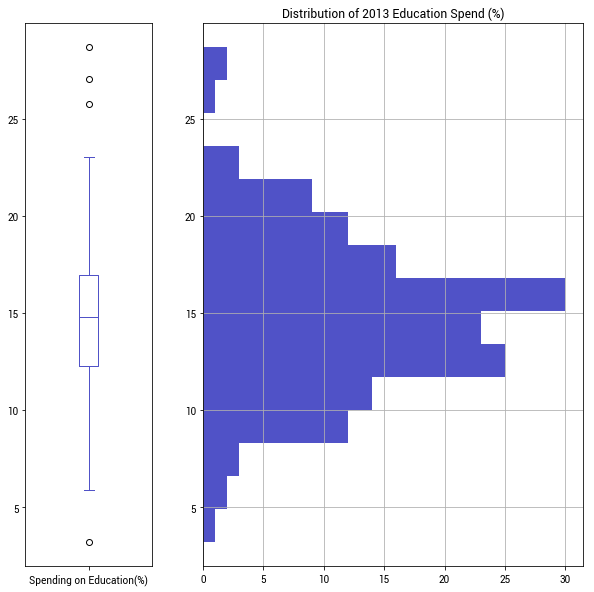

In [249]:
f, ax = plt.subplots(1, 2, figsize = (10,10), gridspec_kw = {'width_ratios':[1, 3]}) #Create subplots to allow multiple plots in one
merged_df.iloc[:, 0].hist(color = col[0], ax = ax[1], orientation='horizontal', bins = 15) #plot histogram
merged_df.iloc[:, 0].plot(kind = 'box', ax = ax[0], color = col[0]) #plot boxplot
plt.title('Distribution of 2013 Education Spend (%)') #set title
plt.show()

#### Get Distribution of GDP Growth (%)

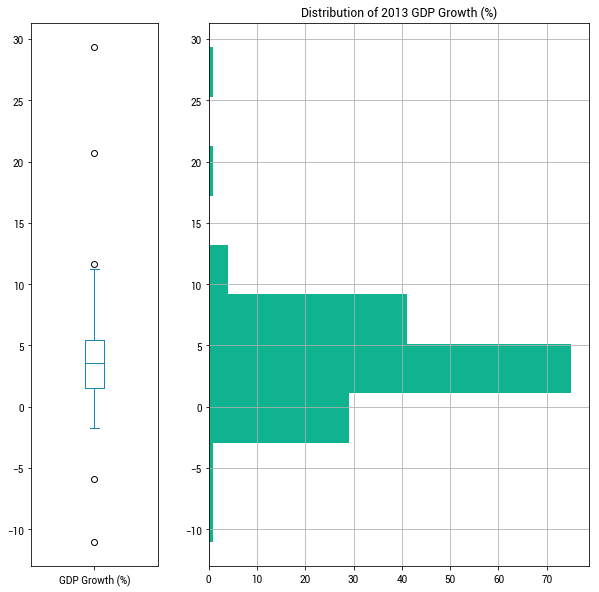

In [250]:
f, ax = plt.subplots(1, 2, figsize = (10,10), gridspec_kw = {'width_ratios':[1, 3]}) #Create subplots to allow multiple plots in one
merged_df.iloc[:, 1].hist(color = col[2], ax = ax[1], orientation='horizontal', bins = 10)  #plot histogram
merged_df.iloc[:, 1].plot(kind = 'box', ax = ax[0], color = col[1]) #plot boxplot
plt.title('Distribution of 2013 GDP Growth (%)') #set title
plt.show()

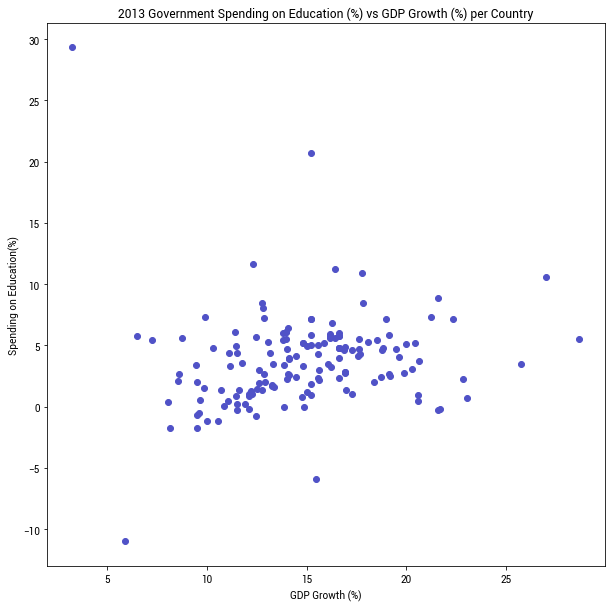

In [254]:
plt.figure(figsize = (10,10))
plt.scatter(x = merged_df['Spending on Education(%)'], y = merged_df['GDP Growth (%)'], color = col[0])
plt.xlabel(merged_df.columns[1])
plt.ylabel(merged_df.columns[0])
plt.title('2013 Government Spending on Education (%) vs GDP Growth (%) per Country')
plt.show()

In [78]:
# Note the difference in argument order
model = sm.OLS(merged_df['GDP Growth (%)'], merged_df['Spending on Education(%)']).fit()

In [79]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         GDP Growth (%)   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     142.0
Date:                Tue, 21 Aug 2018   Prob (F-statistic):           1.55e-23
Time:                        18:49:59   Log-Likelihood:                -424.97
No. Observations:                 153   AIC:                             851.9
Df Residuals:                     152   BIC:                             855.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Spending on Education(%)     0.2438      0.020     11.917      0.000       0.203       0.284
==============================================================================
Omnibus:                      130.468   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2615.042
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      22.452   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

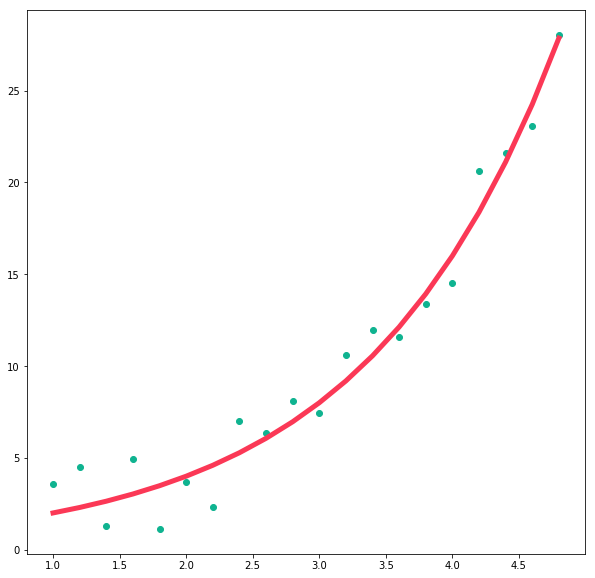

In [186]:
import pylab
x = np.arange(1,5, 0.2)
y = [2**i + np.random.normal() for i in x]
plt.figure(figsize = (10,10))
plt.scatter(x = x, y = y, color = col[2])
pylab.plot(x, 2**x  , color = col[4], lw = 5)
#plt.ylim([-1, 5])
plt.show()

In [137]:
pylab.plot?

Signature: pylab.plot(*args, **kwargs)
Docstring:
Plot lines and/or markers to the
:class:`~matplotlib.axes.Axes`.  *args* is a variable length
argument, allowing for multiple *x*, *y* pairs with an
optional format string.  For example, each of the following is
legal::

    plot(x, y)        # plot x and y using default line style and color
    plot(x, y, 'bo')  # plot x and y using blue circle markers
    plot(y)           # plot y using x as index array 0..N-1
    plot(y, 'r+')     # ditto, but with red plusses

If *x* and/or *y* is 2-dimensional, then the corresponding columns
will be plotted.

If used with labeled data, make sure that the color spec is not
included as an element in data, as otherwise the last case
``plot("v","r", data={"v":..., "r":...)``
can be interpreted as the first case which would do ``plot(v, r)``
using the default line style and color.

If not used with labeled data (i.e., without a data argument),
an arbitrary number of *x*, *y*, *fmt* groups can be specif

In [100]:
x

[-10.408037590253024,
 -7.7549289569674205,
 -7.1233862281299141,
 -7.3833394772108427,
 -4.6191440704467253,
 -3.3988361009439574,
 -3.540714636007785,
 -3.3762071072384696,
 -1.3137711975622477,
 -1.4062275548847991,
 -0.45873417326914601,
 -0.1831270367292861,
 0.078025471036885508,
 1.6115912847106739,
 4.8792688465655978,
 2.7417961685431718,
 6.3851113608204848,
 7.260344550828334,
 7.6784432813876329,
 8.339854478543451]